### project 2- DSC680 

### Happiness 2019
soukhna Wade
10/10/2020

### Introduction

There are three parts to my report as follows:

** Cleaning
** Visualization
** Random Forest

The purpose of choosing this work is to find out which factors are more important to live a happier life. As a result, people and countries can focus on the more significant factors to achieve a higher happiness level. We also will implement several machine learning algorithms to predict the happiness score and compare the result to discover which algorithm works better for this specific dataset.

 https://www.kaggle.com/pinarkaya/world-happiness-eda-visualization-ml#2019-Data
              


### Import necessary Libraries

In [1]:
# Standard library import-Python program# for some basic operations
import pandas as pd 
import numpy as np                 # linear algebra

import matplotlib.pyplot as plt    # for graphics
import seaborn as sns              # for visualizations
plt.style.use('fivethirtyeight')                

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Use to configure display of graph
%matplotlib inline 

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

### Import and read Dataset from local library

In [2]:
#The following command imports the CSV dataset using pandas:
import pandas as pd 

happyness_2019 = pd.read_csv("happyness_2019.csv")

happyness_2019.head(3) 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [3]:
happyness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

**Looking at the current shape of the dataset under consideration**

In [4]:
# Looking at the current shape of the dataset under consideration
#df.shape   

# Step 2:  check the dimension of the table or the size of dataframe

print("The dimension of the table is: ",happyness_2019.shape)

The dimension of the table is:  (156, 9)


### Cleaning - Is threre any missing  or null Values in this dataset (happyness_2019)?

In this section, we load our dataset and see the structure of happiness variables. Our dataset is pretty clean, and we will implement a few adjustments to make it looks better.

In [5]:
#check for any missing values or null values (NA or NaN)
happyness_2019 .isnull().sum()
#df.isnull().head(6)

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

** Note that the above result no missing values so, the dataset is pretty cleaned.**

In [7]:
# Print a list datatypes of all columns 
  
#happyness_2019 .dtypes

# Exploratory Data Analysis

**Prints information of all columns:**

In [8]:
happyness_2019 .info() # Prints information of all columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


**Display some statistical summaries of the numerical columns data. 
 To see the statistical details of the dataset, we can use describe():**

In [9]:
happyness_2019 .describe().head(2)     # display some statistical summaries of the numerical columns data.

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.5,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603


In [10]:
happyness_2019.columns               # display the list of the columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

###  Let us examine the data for the county very happy and the one that is not 

In [11]:
maxSupport=np.max(happyness_2019["Social support"])
maxSupport

1.624

In [12]:
maxEconomy=np.max(happyness_2019["GDP per capita"])
maxEconomy

1.6840000000000002

In [13]:
happyness_2019[happyness_2019['Score']==np.max(happyness_2019['Score'])]['Country or region']

0    Finland
Name: Country or region, dtype: object

In [14]:
maxSupport=np.min(happyness_2019["Social support"])
maxSupport

0.0

In [15]:
minEconomy=np.min(happyness_2019["GDP per capita"])
minEconomy

0.0

In [16]:
happyness_2019[happyness_2019['Score']==np.min(happyness_2019['Score'])]['Country or region']

155    South Sudan
Name: Country or region, dtype: object

### To rename columns

In [17]:
happyness_2019 .rename(columns={"Country or region":"Country",
                      "GDP per capita":"Economy",
                     "Healthy life expectancy":"Health",
                     "Freedom to make life choices":"Freedom",
                     "Overall rank":"Happiness Rank"},inplace=True)
happyness_2019 .columns

Index(['Happiness Rank', 'Country', 'Score', 'Economy', 'Social support',
       'Health', 'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')

**Removing unnecessary columns (Freedom to make life choices and Healthy life expectancy)**

In [18]:
''' drop multiple column based on name in pandas'''

df_new = happyness_2019 .drop(['Perceptions of corruption', 'Generosity'], axis = 1)
df_new
df_new.shape

(156, 7)

In [19]:
df_new.columns

Index(['Happiness Rank', 'Country', 'Score', 'Economy', 'Social support',
       'Health', 'Freedom'],
      dtype='object')

In [20]:
df_new.head(1)

,Happiness Rank,Country,Score,Economy,Social support,Health,Freedom
0,1,Finland,7.769,1.34,1.587,0.986,0.596


# Visualization

### The correlation of the variables of the dataset 

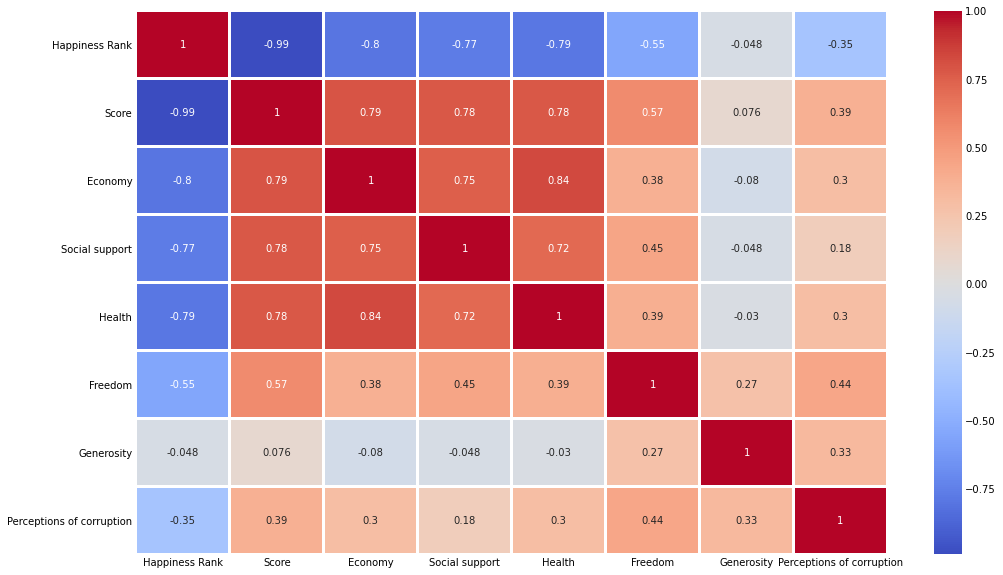

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(happyness_2019 .corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

There is an inverse correlation between “overall Rank” and all the other numerical variables. The lower the happiness rank, the higher the score, and the higher the other six factors that contribute to happiness.



### The correlation of the new dataset  after droping columns -    (Perceptions of corruption,and Generosity) 


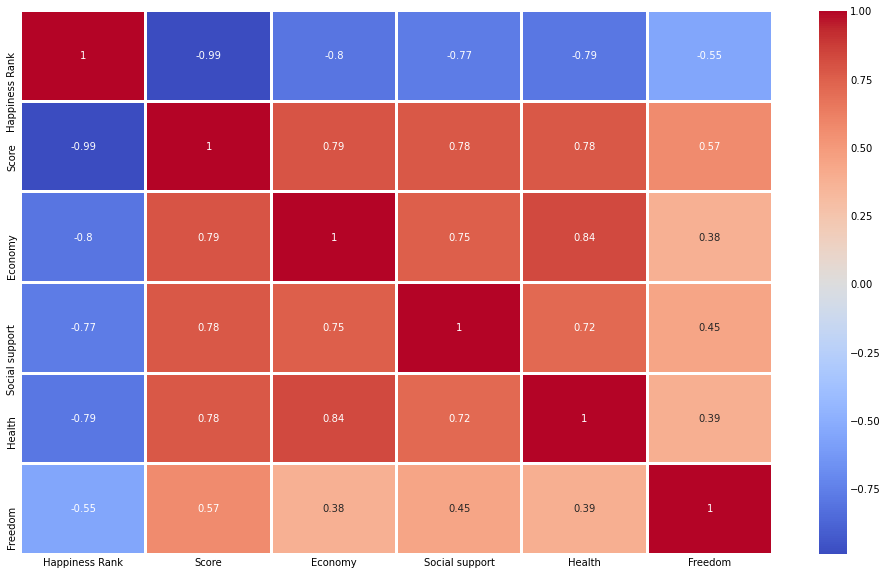

In [22]:
#The correlation of the new dataset
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df_new.corr(),cmap='coolwarm',ax=ax,annot=True,linewidths=2)

According to the above correlation plot, Economy, social support, and health play the most significant role in contributing to happiness. Freedom, generosity and perceptions of corruption have the lowest impact on the happiness score.

In [23]:
happyness_2019.columns

Index(['Happiness Rank', 'Country', 'Score', 'Economy', 'Social support',
       'Health', 'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')

#  Let's see relationship between different features with happiness score.

### 1. GDP per capita

Relationship between GDP per capita(Economy of country) has postive strong relationship with happiness score.
So If GDP per Capita of a country is high than Happiness Score of that country also more likely to high.

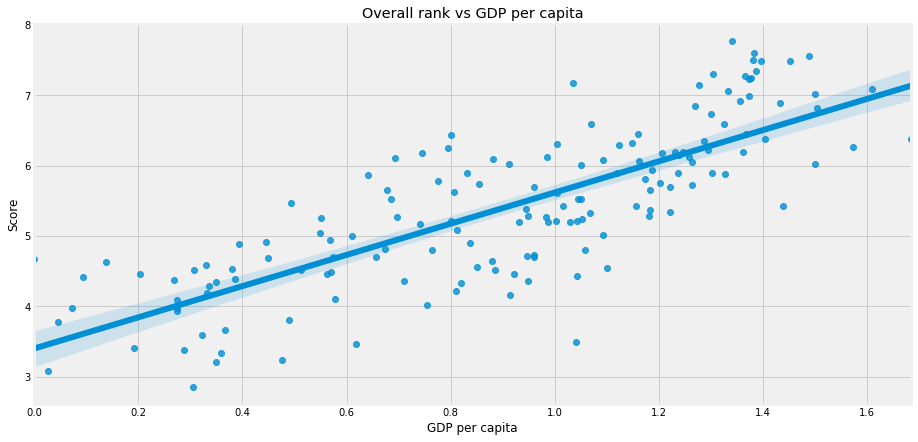

In [24]:
#https://www.kaggle.com/dgtech/world-happiness-with-basic-visualization-and-eda
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd 

happyness_2019 = pd.read_csv("happyness_2019.csv")

plt.figure(figsize=(14,7))

plt.title("Overall rank vs GDP per capita")
sb.regplot(data=happyness_2019, x='GDP per capita', y='Score');

***Using the histogram helps us to make the decision making process a lot more easy to handle by viewing the data that was collected***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C88053190>,
      dtype=object)

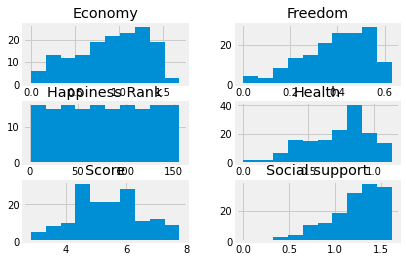

In [25]:
df_new.hist()

### How is the Happiness Score is distributed?

As you can see below happiness score has values above 2.86 and below 7.77. So there is no single country which has happiness score above 8.

,Happiness Rank,Country,Score,Economy,Social support,Health,Freedom
0,1,Finland,7.769,1.34,1.587,0.986,0.596


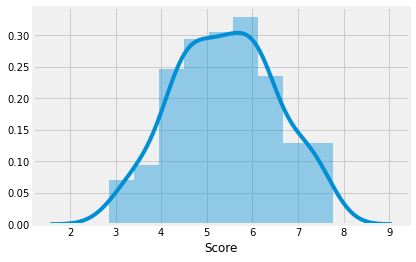

In [26]:
sns.distplot(df_new['Score'])
df_new.head(1)

### Top 10 Countries with high GDP (Economy)

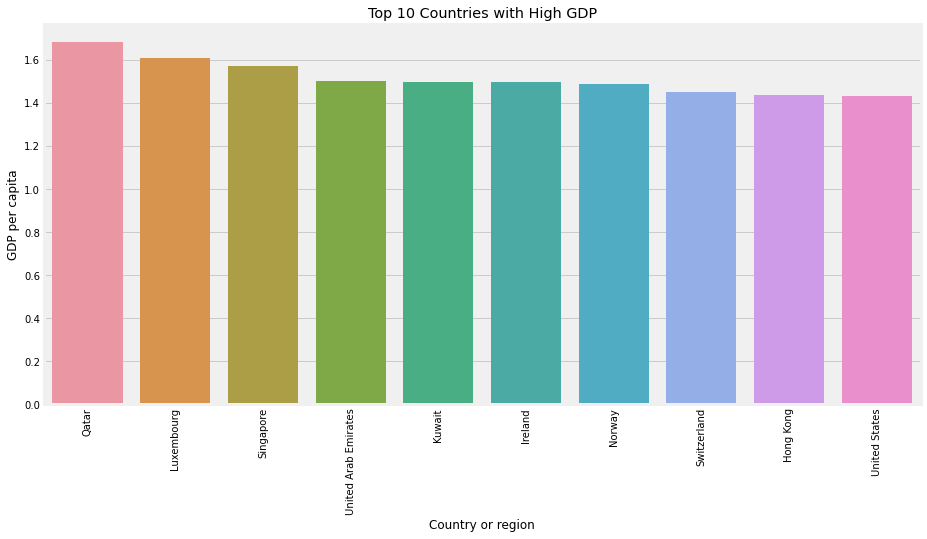

In [27]:
plt.figure(figsize=(14,7))
plt.title("Top 10 Countries with High GDP")
sb.barplot(data = happyness_2019.sort_values('GDP per capita', ascending= False).head(10), y='GDP per capita', x='Country or region')
plt.xticks(rotation=90);

### 2. Perceptions of corruption

Distribution of Perceptions of corruption rightly skewed, which means very less number of country has high perceptions of corruption. That means most of the country has corruption problem.

Corruption is a very big problem for the word.
How corruption can impact on Happiness Score?

Perceptions of corruption data is highly skewed no wonder why the data has weak linear relationship, but as you can see in scatter plot most of the data points are on left side and most of the countries with low perceptions of corruption has happiness score between 4 to 6.

Countries with high perception score has high happiness score above 7.

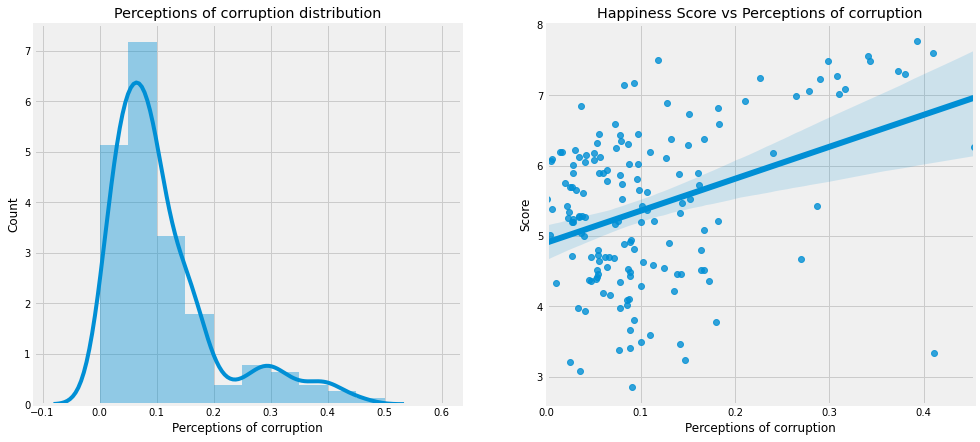

In [28]:
plt.figure(figsize= (15,7))

plt.subplot(1,2,1)
plt.title("Perceptions of corruption distribution")
sb.distplot(a=happyness_2019['Perceptions of corruption'], bins =np.arange(0, 0.45+0.2,0.05))
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.title("Happiness Score vs Perceptions of corruption")
sb.regplot(data=happyness_2019, x='Perceptions of corruption', y='Score');


### Top 10 Countries with high Perceptions of corruption

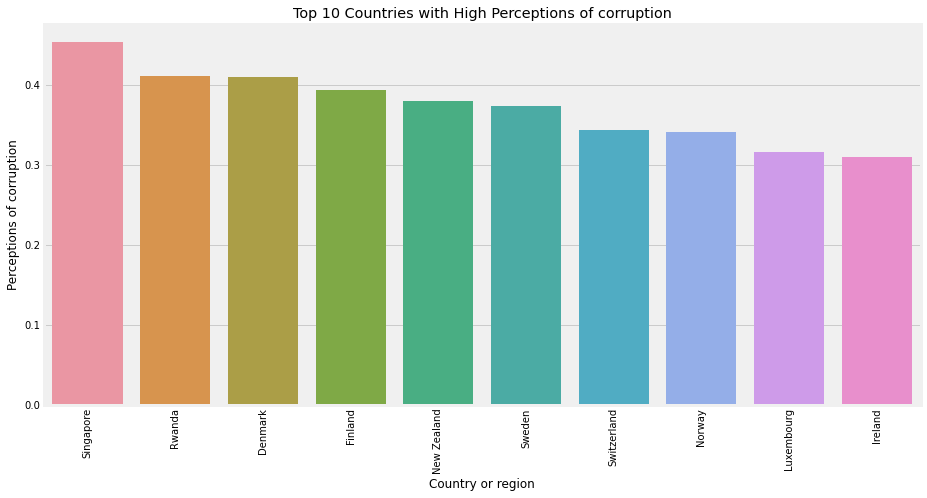

In [29]:
plt.figure(figsize=(14,7))
plt.title("Top 10 Countries with High Perceptions of corruption")
sb.barplot(data =happyness_2019.sort_values('Perceptions of corruption', ascending= False).head(10), x='Country or region', y='Perceptions of corruption')
plt.xticks(rotation=90);

### 3. Healthy life expectancy

A healthy life expectancy has a strong and positive relationship with a happiness score. If a country has a high life expectancy that means it can also have a high happiness score. It makes sense because anyone who has a very long healthy life he/she is happy. Everyone likes to get a healthy and long life aren't you.

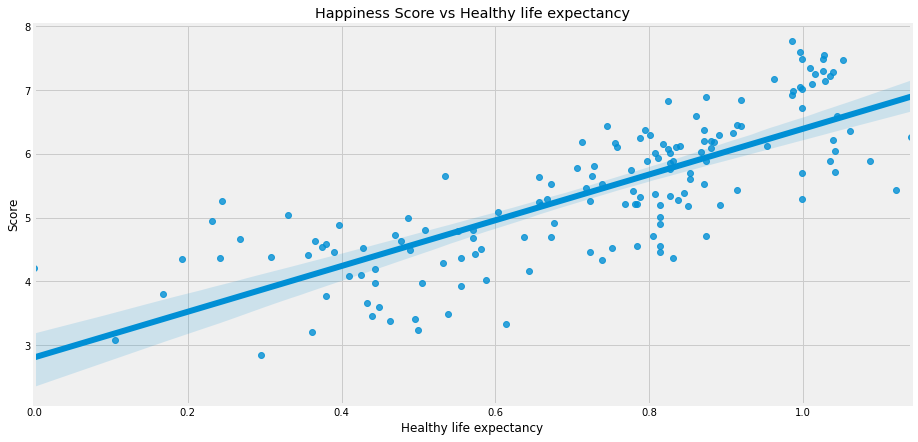

In [30]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Healthy life expectancy")
sb.regplot(data=happyness_2019, x='Healthy life expectancy', y='Score');

### Top 10 Countries with high Healthy life expectancy

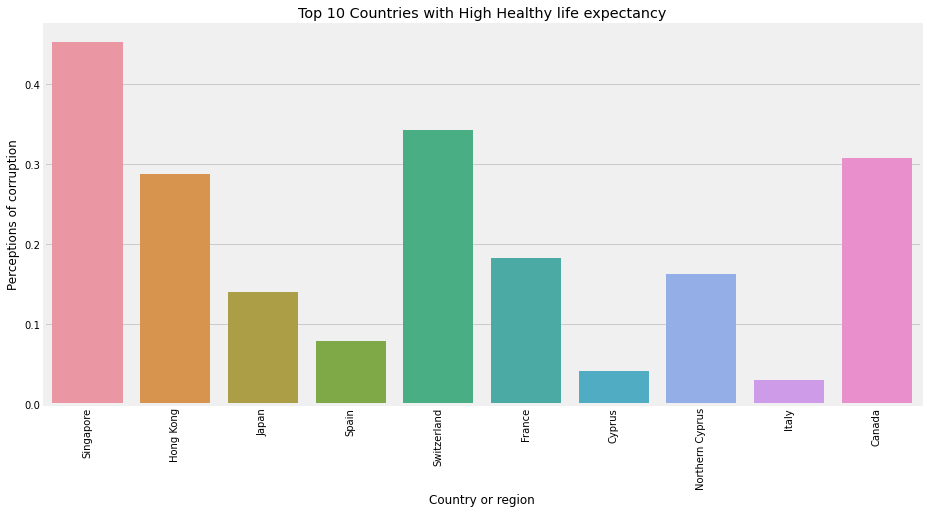

In [31]:
plt.figure(figsize=(14,7))
plt.title("Top 10 Countries with High Healthy life expectancy")
sb.barplot(data = happyness_2019.sort_values('Healthy life expectancy', ascending= False).head(10), x='Country or region', y='Perceptions of corruption')
plt.xticks(rotation=90);

### 4. Social Support

Social support of countries also has a strong and positive relationship with happiness scores. 
Also, the relationship with happiness score needs to be strong because the more you will help socially more you will be happy.

Social support measures the perception that one has assistance available, the received assistance, or the degree to which a person can integrate into a social network. Support can come from many sources, such as family, friends, pets, neighbors, coworkers,



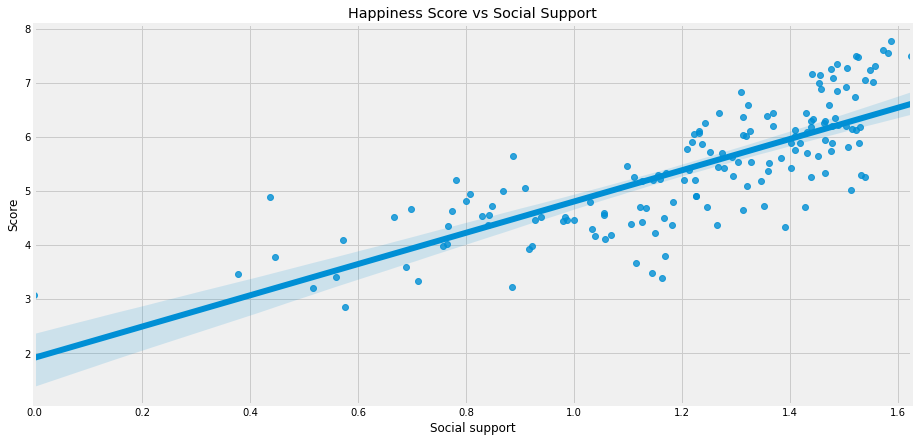

In [32]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
import pandas as pd 

happyness_2019 = pd.read_csv("happyness_2019.csv")
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Social Support")
sb.regplot(data=happyness_2019, x='Social support', y='Score');

# Top 20 Countries with high Social Support

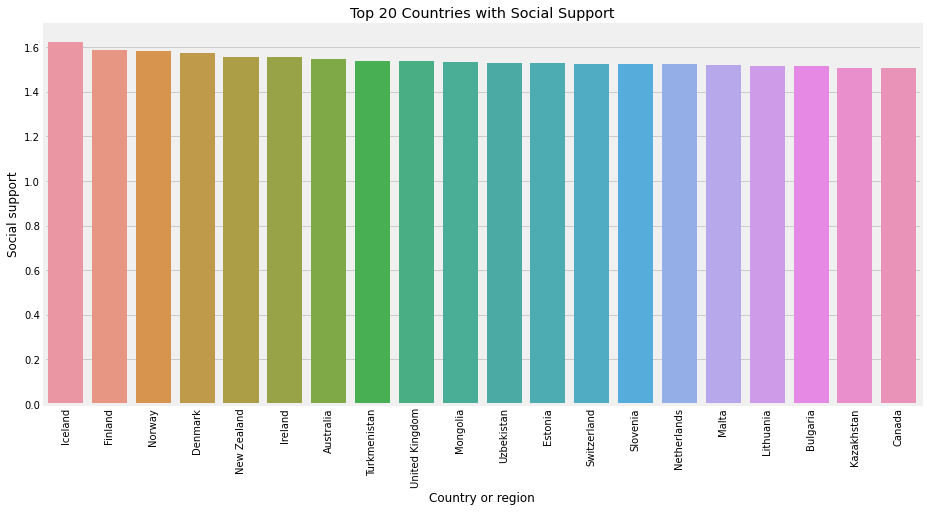

In [33]:
plt.figure(figsize=(14,7))
plt.title("Top 20 Countries with Social Support")
sb.barplot(data = happyness_2019.sort_values('Social support', ascending= False).head(20), x='Country or region', y='Social support')
plt.xticks(rotation=90);


# Freedom to make life choices

“Freedom to make life choices” is the national average of responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”


Freedom to make life choices has some positive relationships with happiness scores. This relation makes sense because the more you will get free to make decisions about your life, the more you will be happy.

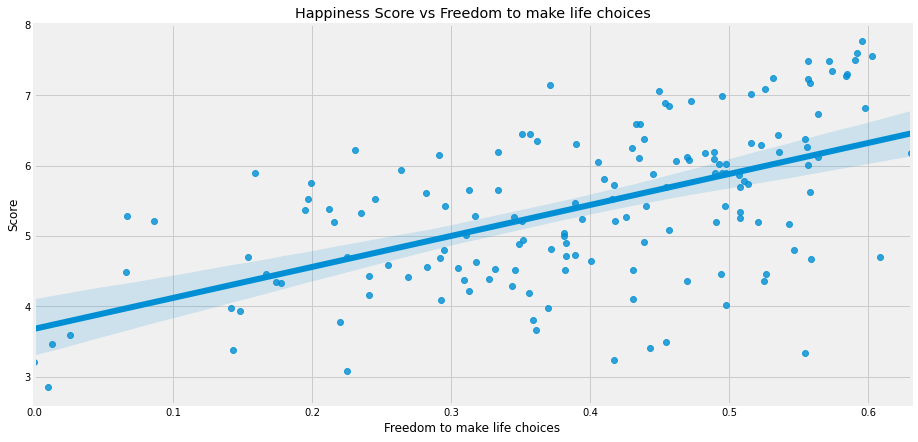

In [34]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Freedom to make life choices")
sb.regplot(data=happyness_2019, x='Freedom to make life choices', y='Score');

# Top 10 Countries with high Freedom to make life choices

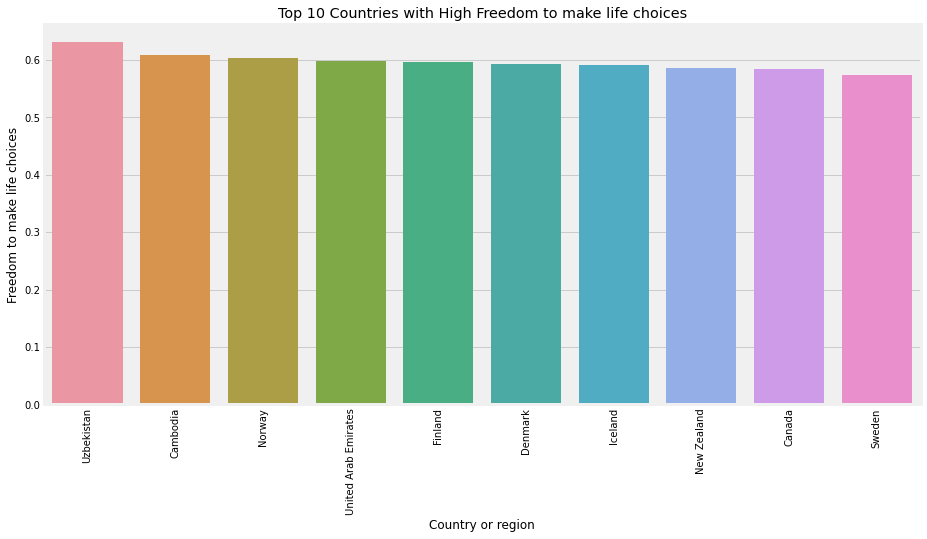

In [35]:
plt.figure(figsize=(14,7))
plt.title("Top 10 Countries with High Freedom to make life choices")
sb.barplot(data = happyness_2019.sort_values('Freedom to make life choices', ascending= False).head(10), x='Country or region', y='Freedom to make life choices')
plt.xticks(rotation=90);

### 6. Generosity
Generosity and life expectancy are among the six variables scientists peek at when making the World Happiness Report.

Generosity has a weak linear relationship with the happiness score. One can ask a question:" Why generosity has not a linear relationship with happiness score?

Generosity score depends on the countries that can give the most to nonprofits around the world. Countries which are not generous that does not mean they are not happy.


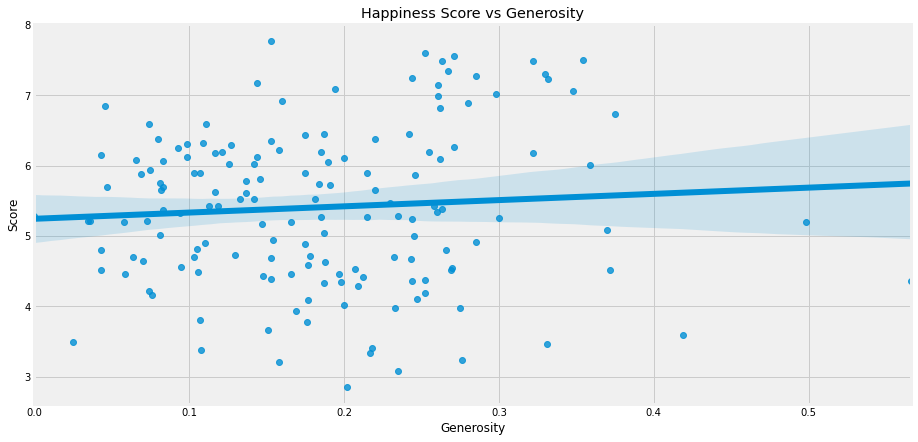

In [36]:
plt.figure(figsize=(14,7))

plt.title("Happiness Score vs Generosity")
sb.regplot(data=happyness_2019, x='Generosity', y='Score');

# Top 10 Countries with high Generosity

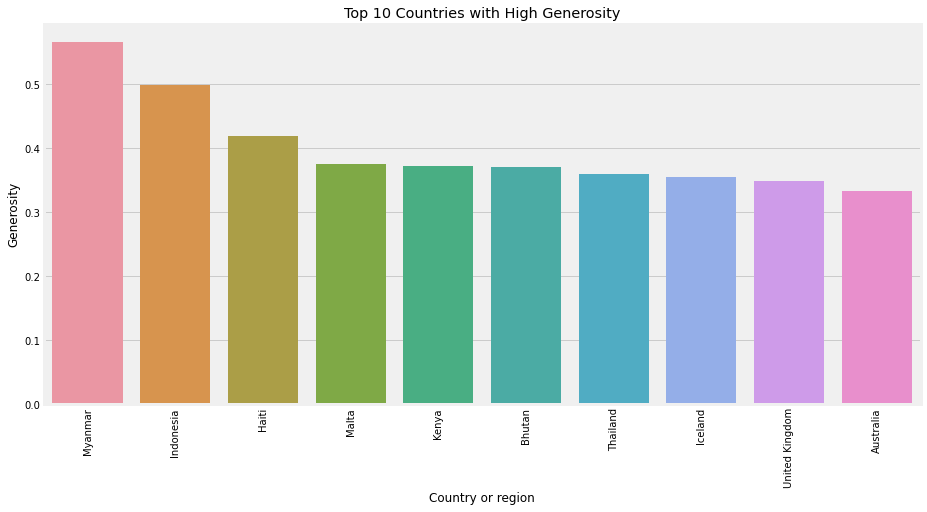

In [37]:
plt.figure(figsize=(14,7))

plt.title("Top 10 Countries with High Generosity")
sb.barplot(data = happyness_2019.sort_values('Generosity', ascending= False).head(10), x='Country or region', y='Generosity')
plt.xticks(rotation=90);

# How one feature is related to another feature?

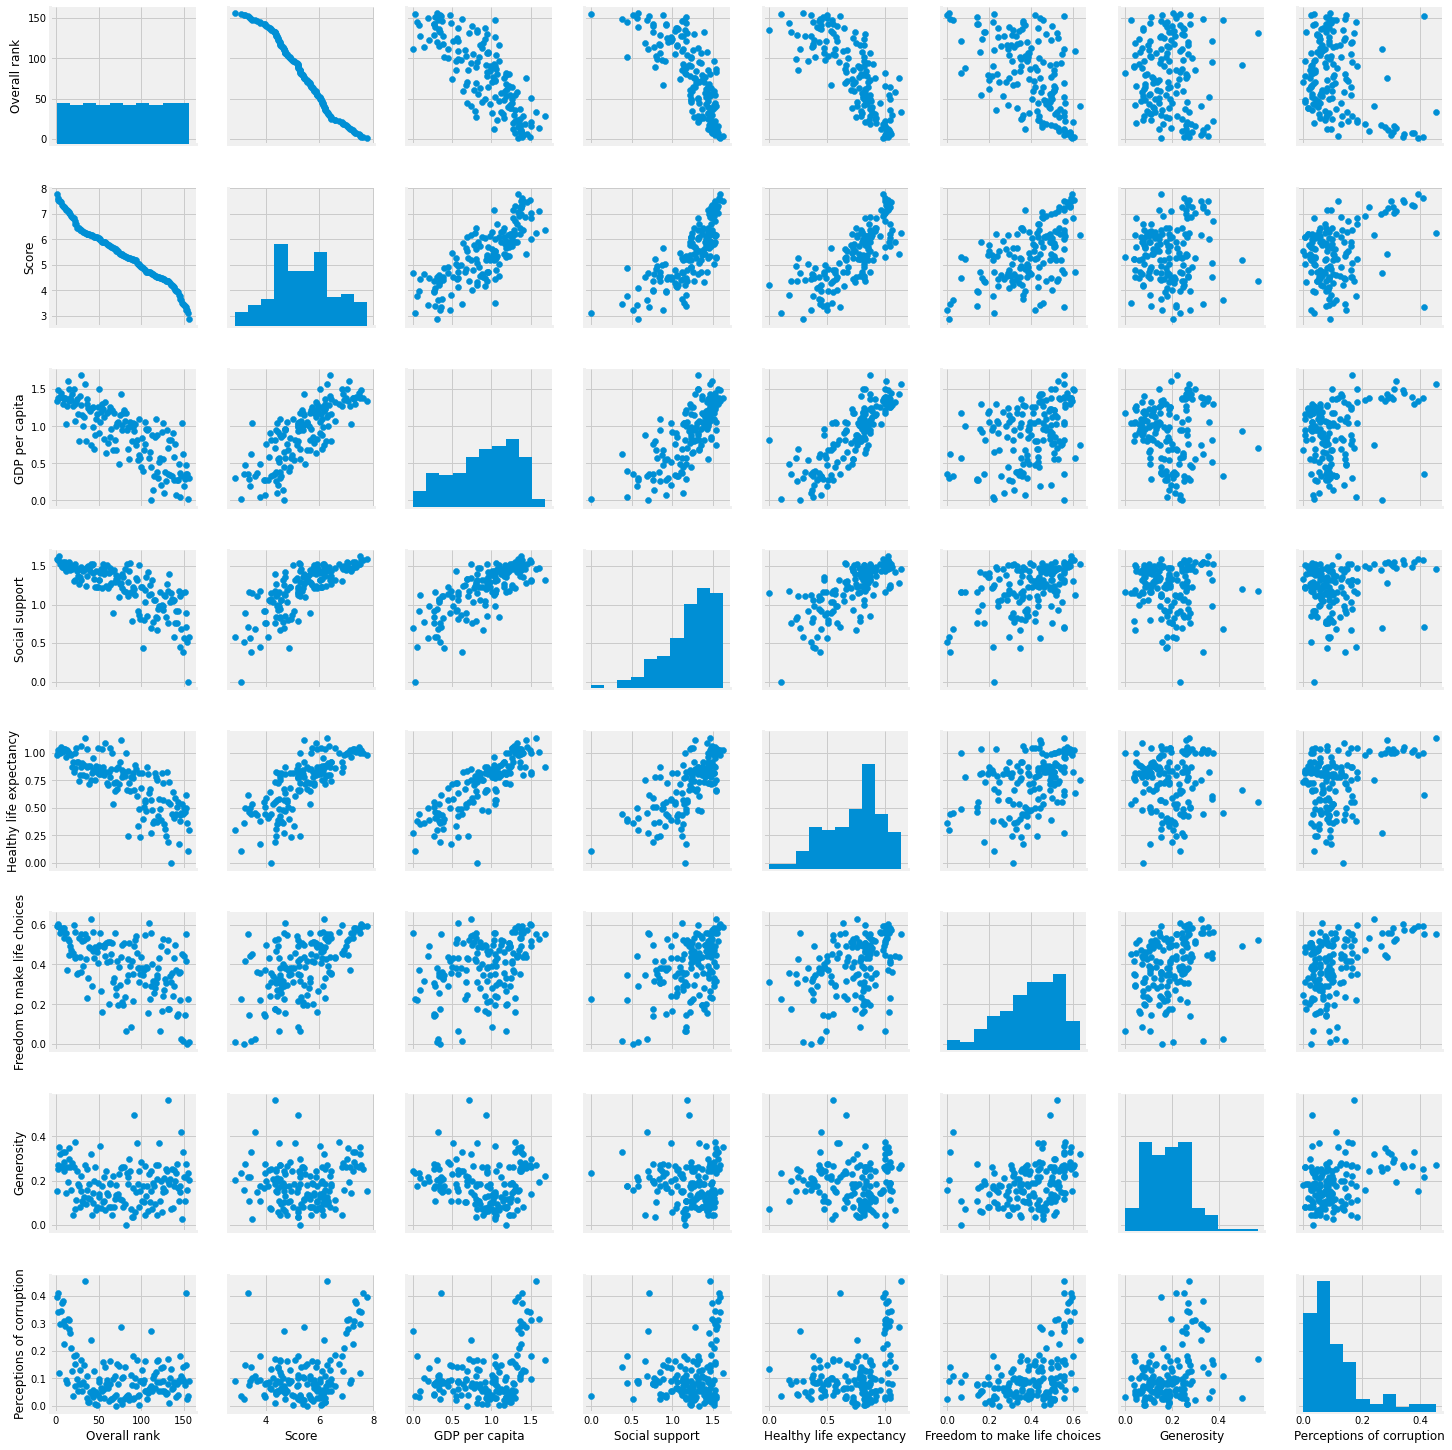

In [38]:
p = sb.PairGrid(happyness_2019)
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter);

# correlation of the entire dataset

In [39]:
happyness_2019.corr() # correlation of the entire dataset

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


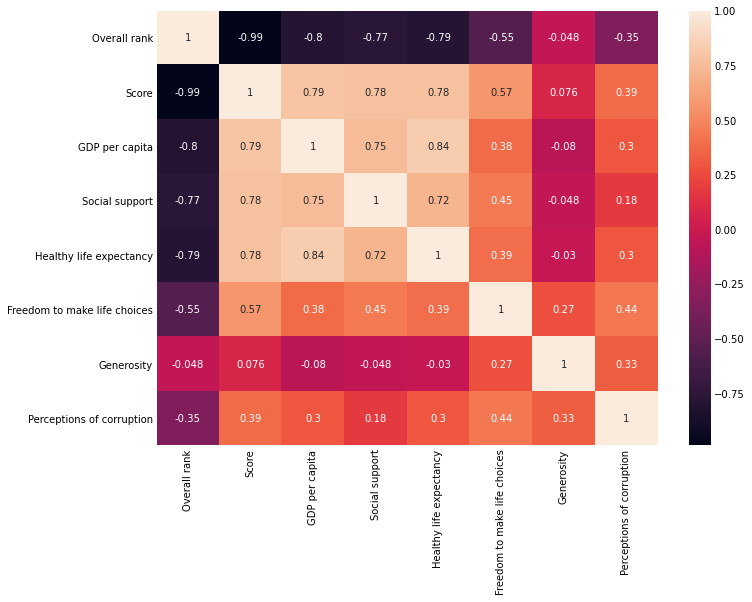

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(happyness_2019.corr(), annot=True);

# Random Forest

In [41]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression


In [42]:
#The following command imports the CSV dataset using pandas:
import pandas as pd 

happyness_2019 = pd.read_csv("happyness_2019.csv")


### Data Preprocessing will be done with the help of following script lines

In [43]:
x=happyness_2019.iloc[:,3:]
y=happyness_2019["Score"]
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#print(y_train.shape)
#print(y_test.shape)

### Next, we will divide the data into train and test split. The following code will split the dataset into 70% training data and 30% of testing data.

In [44]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print(y_train.shape)
print(y_test.shape)

(109,)
(47,)


### Next, train the model with the help of RandomForestClassifier class of sklearn as follows

In [45]:
model=RandomForestRegressor(random_state=45)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=45)

In [46]:
pred=model.predict(x_test)
np.sqrt(mean_squared_error(y_test,pred))

0.5861206005175589

In [47]:
params={"max_depth":list(range(5,10)),
       "max_features":[5,10],
       "n_estimators":[200,500,1000,]}

In [48]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)
cv_model=GridSearchCV(rf_model,params,cv=10,n_jobs=-1)
cv_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9], 'max_features': [5, 10],
                         'n_estimators': [200, 500, 1000]})

In [49]:
cv_model.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 1000}

In [50]:
son_model=RandomForestRegressor(max_depth=9,
                                max_features=5,
                                n_estimators=1000)
son_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features=5, n_estimators=1000)

In [51]:
predicted=son_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,predicted))

0.5798555286396425

### To Continue with project 3